# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
import 

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

In [7]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Create endpoint URL with each city
city_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_name = []
city_weather = []
city_data = []
city_lat = [] 
city_lng = [] 
city_max_temp = []  
city_humidity = [] 
city_clouds = [] 
city_wind = [] 
city_country = [] 
city_date = [] 

    
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
            set_count += 1
    #record_count = 0
    #city_url = url + "&q=" + city
    response = requests.get(city_url + city).json()
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather.append(response['weather'])

     # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_name.append(city)
        city_lat.append(response['coord']['lat'])
        city_lng.append(response['coord']['lon'])
        city_max_temp.append(response['main']['temp_max'])
        city_humidity.append(response['main']['humidity'])
        city_clouds.append(response['clouds']['all'])
        city_wind.append(response['wind']['speed'])
        city_country.append(response['sys']['country'])
        city_date.append(response['dt'])

     # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# # Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zuera
Processing Record 2 of Set 1 | alofi
Processing Record 3 of Set 1 | wailua homesteads
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | nova sintra
Processing Record 7 of Set 1 | mangrol
Processing Record 8 of Set 1 | haiku-pauwela
Processing Record 9 of Set 1 | petropavlovsk-kamchatsky
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | bethel
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | baskil
Processing Record 15 of Set 1 | kapa'a
Processing Record 16 of Set 1 | bihac
Processing Record 17 of Set 1 | kodinsk
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | cam ranh
Processing Record 20 of Set 1 | dubinino
Processing Record 21 of Set 1 | cill airne
Processing Record 22 of Set 1 | lagos
Pro

In [10]:
# Convert the cities weather data into a Pandas DataFrame
weather_data = {
        "City": city_name,
        "Lat": city_lat, 
        "Lng": city_lng, 
        "Max Temp": city_max_temp,
        "Humidity": city_humidity,
        "Cloudiness": city_clouds,
        "Wind Speed": city_wind,
        "Country": city_country,
        "Date": city_date}
city_data_df = pd.DataFrame(weather_data)

# Show Record Count
city_data_df.isnull().sum()
city_data_df.dropna()
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [11]:
# Display sample data
# weather_data.to_csv(output_data_file, index=False)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zuera,41.8677,-0.7898,64.08,72,55,7.72,ES,1682473084
1,alofi,-19.0595,-169.9187,84.09,70,77,12.66,NU,1682473084
2,wailua homesteads,22.0669,-159.3780,79.23,70,100,13.80,US,1682473084
3,adamstown,-25.0660,-130.1015,76.69,76,5,11.54,PN,1682472840
4,albany,42.6001,-73.9662,44.31,73,3,4.03,US,1682473044
...,...,...,...,...,...,...,...,...,...
577,port clinton,41.5120,-82.9377,43.59,96,100,1.99,US,1682472840
578,kulhudhuffushi,6.6221,73.0700,83.70,70,96,8.25,MV,1682473008
579,sinabang,2.4803,96.3801,84.25,73,100,3.29,ID,1682473009
580,petawawa,45.9001,-77.3328,38.79,92,100,4.61,CA,1682473009


In [96]:
# Export the City_Data into a csv
city_data_df.to_csv("cities_challenge_6.csv", index_label="City_ID")
# city_data_df.to_csv("cities.csv", header =True , index =True,)

In [97]:
# Read saved data
city_data_df = pd.read_csv("cities_challenge_6.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zuera,41.8677,-0.7898,64.08,72,55,7.72,ES,1682473084
1,alofi,-19.0595,-169.9187,84.09,70,77,12.66,NU,1682473084
2,wailua homesteads,22.0669,-159.3780,79.23,70,100,13.80,US,1682473084
3,adamstown,-25.0660,-130.1015,76.69,76,5,11.54,PN,1682472840
4,albany,42.6001,-73.9662,44.31,73,3,4.03,US,1682473044


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

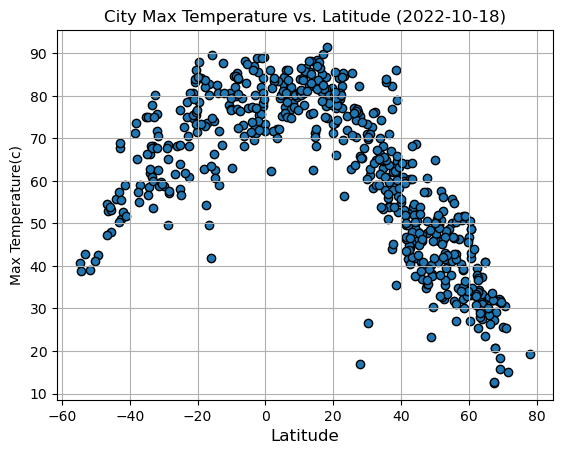

In [95]:
# Build scatter plot for latitude vs. temperature

x_axis_scatter = city_data_df['Lat']
y_axis_scatter = city_data_df['Max Temp']

plt.scatter(x_axis_scatter,y_axis_scatter,edgecolors= "black")
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Max Temperature(c)')
plt.title('City Max Temperature vs. Latitude (2022-10-18)')
plt.grid ()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig1_Challenge_6.png")


# Show plot
plt.show()

#### Latitude Vs. Humidity

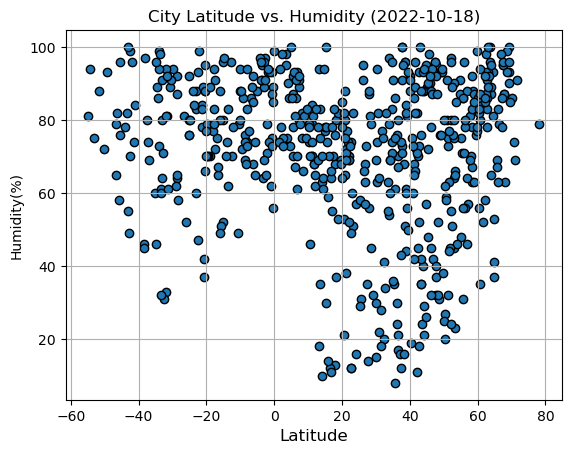

In [92]:
# Build the scatter plots for latitude vs. humidity
x_axis_scatter = city_data_df['Lat']
y_axis_scatter = city_data_df['Humidity']

plt.scatter(x_axis_scatter,y_axis_scatter,edgecolors= "black")
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid ()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig2_challenge_6.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

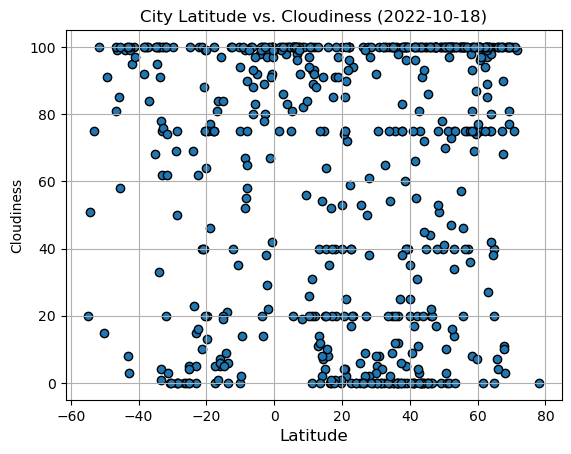

In [93]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
x_axis_scatter = city_data_df['Lat']
y_axis_scatter = city_data_df['Cloudiness']

plt.scatter(x_axis_scatter,y_axis_scatter,edgecolors= "black")
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid ()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig3_challenge_6.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

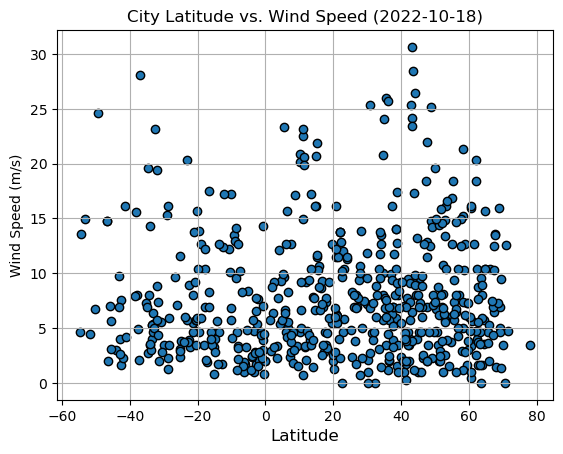

In [94]:
# Build the scatter plots for latitude vs. wind speed
x_axis_scatter = city_data_df['Lat']
y_axis_scatter = city_data_df['Wind Speed']

plt.scatter(x_axis_scatter,y_axis_scatter,edgecolors= "black")
plt.xlabel('Latitude', fontsize = 12)
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid ()

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("Fig4_challenge_6.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [91]:
# Define a function to create Linear Regression plots
def linear_regression (x,y, title, coord):
    (slope, intercept, rvalue, pvalue, stderr)=  linregress(x, y)
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(intercept,2)
    plt.scatter(x,y)
    plt.plot(x,regress_values, "r-")
    plt.annotate(line_eq, coord,fontsize=12, color="red")
    print(f"The rvalue is: {rvalue}")
    
    plt.ylabel(title)
    plt.show()

In [41]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df= city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.reset_index(inplace=True)
# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,zuera,41.8677,-0.7898,64.08,72,55,7.72,ES,1682473084
1,2,wailua homesteads,22.0669,-159.3780,79.23,70,100,13.80,US,1682473084
2,4,albany,42.6001,-73.9662,44.31,73,3,4.03,US,1682473044
3,5,nova sintra,14.8667,-24.7167,68.13,77,4,20.69,CV,1682472841
4,6,mangrol,21.1167,70.1167,79.43,72,2,6.15,IN,1682473085


In [42]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df= city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df.reset_index(inplace=True)

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,1,alofi,-19.0595,-169.9187,84.09,70,77,12.66,NU,1682473084
1,3,adamstown,-25.0660,-130.1015,76.69,76,5,11.54,PN,1682472840
2,9,edinburgh of the seven seas,-37.0676,-12.3116,59.05,69,84,28.07,SH,1682472842
3,10,waitangi,-43.9535,-176.5597,55.81,78,99,3.00,NZ,1682472842
4,12,port-aux-francais,-49.3500,70.2167,42.48,93,91,24.61,TF,1682473086


###  Temperature vs. Latitude Linear Regression Plot

The rvalue is: -0.8953120282127454


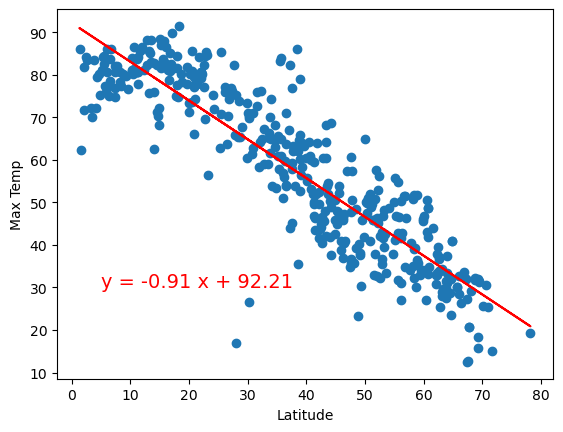

In [83]:
# Linear regression on Northern Hemisphere
x_axis_regrr = northern_hemi_df['Lat']
y_axis_regrr = northern_hemi_df['Max Temp']

(slope, intercept,rvalue, pvalue, stderr)= linregress(x_axis_regrr,y_axis_regrr)
regress_values= x_axis_regrr* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_axis_regrr,y_axis_regrr)
plt.plot(x_axis_regrr, regress_values, "r-")
plt.annotate(line_eq,(5,30), fontsize=14,color = 'red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
# YOUR CODE HERE
print(f"The rvalue is: {rvalue}")

The rvalue is: 0.719558274964118


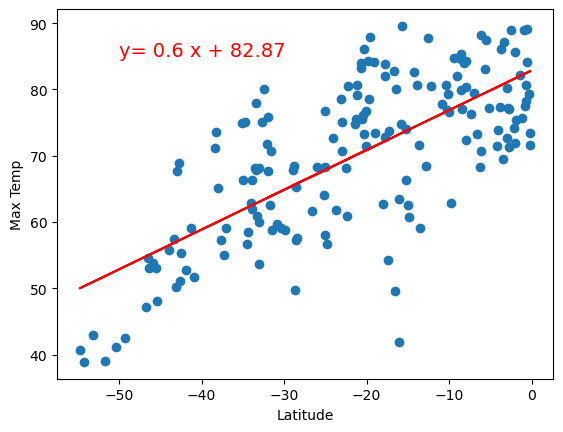

In [84]:
# Linear regression on Southern Hemisphere
x_axis_regrr = southern_hemi_df['Lat']
y_axis_regrr = southern_hemi_df['Max Temp']

(slope, intercept,rvalue, pvalue, stderr)= linregress(x_axis_regrr,y_axis_regrr)
regress_values= x_axis_regrr* slope + intercept
line_eq= f"y= {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_axis_regrr,y_axis_regrr)
plt.plot(x_axis_regrr, regress_values, "r-")
plt.annotate(line_eq,(-50,85), fontsize=14,color = 'red')
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The rvalue is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The rvalue is: 0.10411136275768333


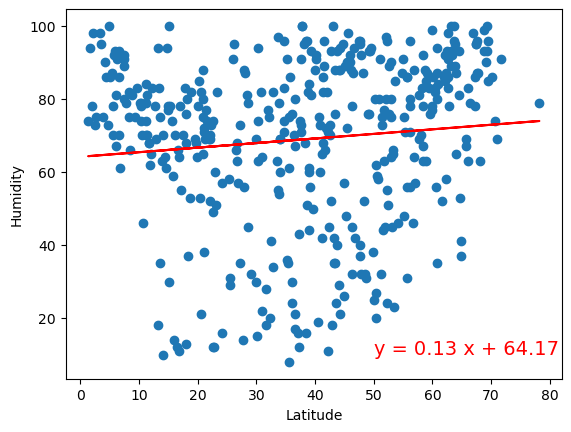

In [85]:
# Northern Hemisphere
x_axis_regrr = northern_hemi_df['Lat']
y_axis_regrr = northern_hemi_df['Humidity']

(slope, intercept,rvalue, pvalue, stderr)= linregress(x_axis_regrr,y_axis_regrr)
regress_values= x_axis_regrr* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_axis_regrr,y_axis_regrr)
plt.plot(x_axis_regrr, regress_values, "r-")
plt.annotate(line_eq,(50,10), fontsize=14,color = 'red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The rvalue is: {rvalue}")

The rvalue is: 0.1156964575646391


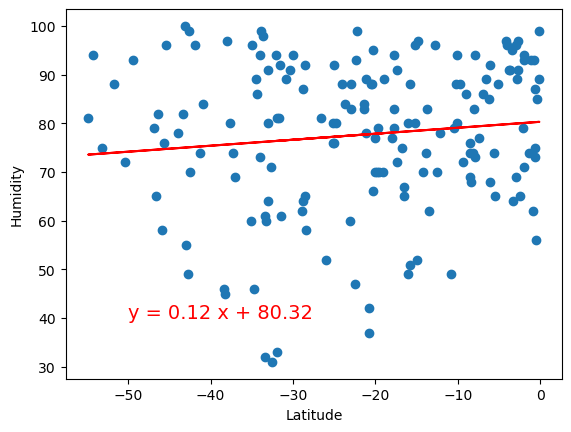

In [86]:
# Southern Hemisphere
x_axis_regrr = southern_hemi_df['Lat']
y_axis_regrr = southern_hemi_df['Humidity']

(slope, intercept,rvalue, pvalue, stderr)= linregress(x_axis_regrr,y_axis_regrr)
regress_values= x_axis_regrr* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_axis_regrr,y_axis_regrr)
plt.plot(x_axis_regrr, regress_values, "r-")
plt.annotate(line_eq,(-50,40), fontsize=14,color = 'red')
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The rvalue is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The rvalue is: 0.1074090983869544


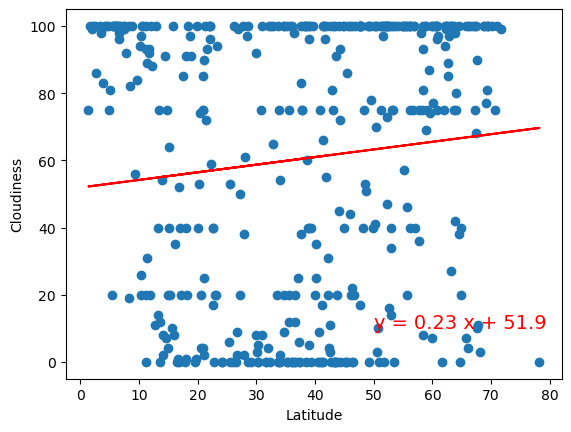

In [87]:
# Northern Hemisphere
x_axis_regrr = northern_hemi_df['Lat']
y_axis_regrr = northern_hemi_df['Cloudiness']

(slope, intercept,rvalue, pvalue, stderr)= linregress(x_axis_regrr,y_axis_regrr)
regress_values= x_axis_regrr* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_axis_regrr,y_axis_regrr)
plt.plot(x_axis_regrr, regress_values, "r-")
plt.annotate(line_eq,(50,10), fontsize=14,color = 'red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The rvalue is: {rvalue}")

The rvalue is: 0.01562986237662098


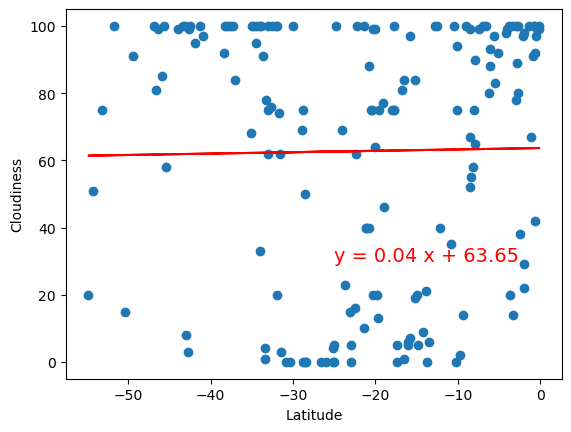

In [90]:
# Southern Hemisphere
x_axis_regrr = southern_hemi_df['Lat']
y_axis_regrr = southern_hemi_df['Cloudiness']

(slope, intercept,rvalue, pvalue, stderr)= linregress(x_axis_regrr,y_axis_regrr)
regress_values= x_axis_regrr* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_axis_regrr,y_axis_regrr)
plt.plot(x_axis_regrr, regress_values, "r-")
plt.annotate(line_eq,(-25,30), fontsize=14,color = 'red')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The rvalue is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The rvalue is: -0.02950215039103588


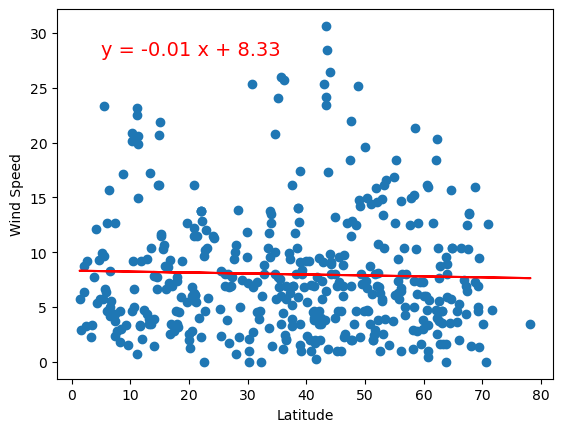

In [88]:
# Northern Hemisphere
x_axis_regrr = northern_hemi_df['Lat']
y_axis_regrr = northern_hemi_df['Wind Speed']

(slope, intercept,rvalue, pvalue, stderr)= linregress(x_axis_regrr,y_axis_regrr)
regress_values= x_axis_regrr* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_axis_regrr,y_axis_regrr)
plt.plot(x_axis_regrr, regress_values, "r-")
plt.annotate(line_eq,(5,28), fontsize=14,color = 'red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The rvalue is: {rvalue}")

The rvalue is: -0.2279459197436757


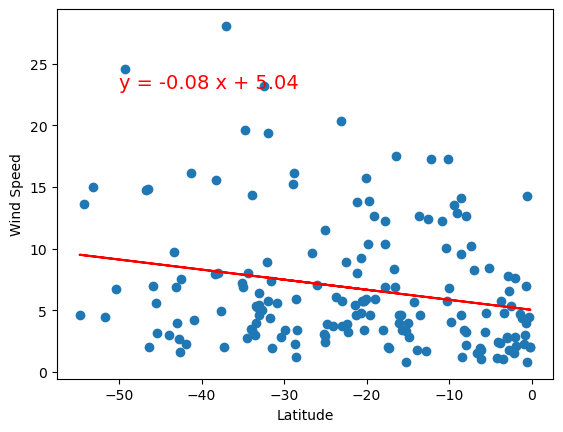

In [89]:
# Southern Hemisphere
x_axis_regrr = southern_hemi_df['Lat']
y_axis_regrr = southern_hemi_df['Wind Speed']

(slope, intercept,rvalue, pvalue, stderr)= linregress(x_axis_regrr,y_axis_regrr)
regress_values= x_axis_regrr* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(x_axis_regrr,y_axis_regrr)
plt.plot(x_axis_regrr, regress_values, "r-")
plt.annotate(line_eq,(-50,23), fontsize=14,color = 'red')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The rvalue is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE